In [1]:
import numpy as np
import numpy.linalg as LA
from load_mnist import loadImageSet, loadLabelSet

%matplotlib inline
import pylab
import matplotlib.pyplot as plt

In [2]:
def pca(data, K=2):
    
    """
    data : M x N matrix (M dimensions, N samples)
    K: The final reduced dimension
    """
    M, N = data.shape
    mn = np.mean(data, keepdims=True, axis=1)
    data = data - mn
    covariance = np.matmul(data, np.transpose(data)) / (N-1)
    eigenValues, eigenVectors = LA.eig(covariance)
    eigValInd=np.argsort(eigenValues)
    eigValInd=eigValInd[::-1][0:K]
    principalEigVects=eigenVectors[:,eigValInd]
#     principalEigVects = absolute(principalEigVects, axis=1)
    lowDimData=np.matmul(np.transpose(data), principalEigVects)
    return lowDimData



In [3]:
def pca2(data, K=2):
    
    """
    data : M x N matrix (M dimensions, N samples)
    K: The final reduced dimension
    """
    M, N = data.shape
    mn = np.mean(data, keepdims=True, axis=1)
    data = data - mn
    print data.shape
    U, S, V = LA.svd(data, full_matrices=True)
    principalEigVects= np.transpose(U)[0:K,:]
#     principalEigVects = absolute(principalEigVects)
    lowDimData=np.matmul(np.transpose(data), np.transpose(principalEigVects))
    return lowDimData

In [4]:
def pca3(data, K=2):
    
    """
    data : M x N matrix (M dimensions, N samples)
    K: The final reduced dimension
    """
    M, N = data.shape
    print data.shape
    mn = np.mean(data, keepdims=True, axis=1)
    data = data - mn
    print data.shape
    Y = np.transpose(data) / np.sqrt(N-1)
    U, S, V = LA.svd(Y, full_matrices=True)
#     eigValInd=np.argsort(eigenValues)
#     eigValInd=eigValInd[::-1][0:K]
    principalEigVects = V[0:K,:]
#     principalEigVects = absolute(principalEigVects)
    lowDimData=np.matmul(np.transpose(data), np.transpose(principalEigVects))
    return lowDimData

In [5]:
train_images = loadImageSet('MNIST_data/train-images-idx3-ubyte') 
train_labels = loadLabelSet('MNIST_data/train-labels-idx1-ubyte')

test_images = loadImageSet('MNIST_data/t10k-images-idx3-ubyte') 
test_labels = loadLabelSet('MNIST_data/t10k-labels-idx1-ubyte')

train_x = train_images[0:2000,:]
train_y = train_labels[0:2000]

test_x = test_images[0:2000,:]
test_y = test_labels[0:2000]

In [6]:
#%%
# 将降维后的数据可视化,2维
def plot_embedding_2d(X, y, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)

    #降维后的坐标为（X[i, 0], X[i, 1]），在该位置画出对应的digits
    fig = plt.figure()
#     plt.axis([-2000, 2000,-2000,2000])
    ax = fig.add_subplot(1, 1, 1)
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1],str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)

/usr/lib/pymodules/python2.7/matplotlib/text.py:684: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
/usr/lib/pymodules/python2.7/matplotlib/text.py:685: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/usr/lib/pymodules/python2.7/matplotlib/text.py:552: ComplexWarning: Casting complex values to real discards the imaginary part
  posx = float(self.convert_xunits(self._x))
/usr/lib/pymodules/python2.7/matplotlib/text.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(self.convert_yunits(self._y))


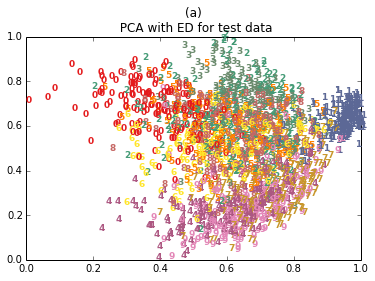

In [7]:
#### PCA with ED for test data
lowDimData = pca(np.transpose(test_x), K=2)
plot_embedding_2d(lowDimData, test_y, title='(a) \n PCA with ED for test data')

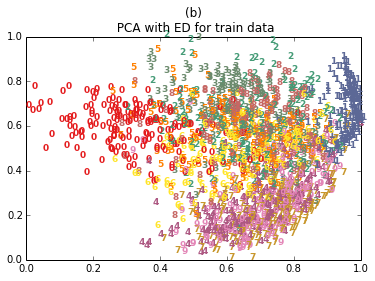

In [8]:
#### PCA with ED for train data
lowDimData = pca(np.transpose(train_x), K=2)
plot_embedding_2d(lowDimData, train_y, title='(b) \n PCA with ED for train data')

(784, 2000)
(784, 2000)


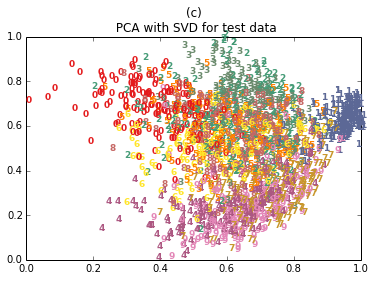

In [9]:
#### PCA with SVD for train data
lowDimData = pca3(np.transpose(test_x), K=2)
plot_embedding_2d(lowDimData, test_y, title='(c) \n PCA with SVD for test data')

(784, 2000)
(784, 2000)


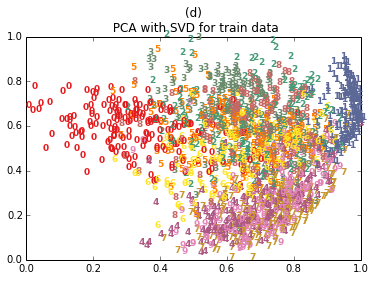

In [10]:
#### PCA with SVD for train data
lowDimData = pca3(np.transpose(train_x), K=2)
plot_embedding_2d(lowDimData, train_y, title='(d) \n PCA with SVD for train data')